In [1]:
import sys
import os
import pandas as pd
import statsmodels.api as sm

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.model import train_ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from src.preprocess import variance_threshold_selector, VarianceThreshold, f_value_selector
from src.model import  train_ols, evaluate_model, train_and_evaluate, print_metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Step 1: Load The Processed Data 

In [2]:
# Load the cleaned and preprocessed data
X = pd.read_csv("data/X_processed.csv")
y = pd.read_csv("data/y_processed.csv").squeeze("columns")  # ✅ 1D Series


In [3]:
X.shape, y.shape

((19735, 44), (19735,))

## Step 2: Train Test Split 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X = your features and y = target variable
# For example:
# X = df.drop("Appliances", axis=1)
# y = df["Appliances"]

# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: print the shape of each split
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (15788, 44) (15788,)
Testing set: (3947, 44) (3947,)


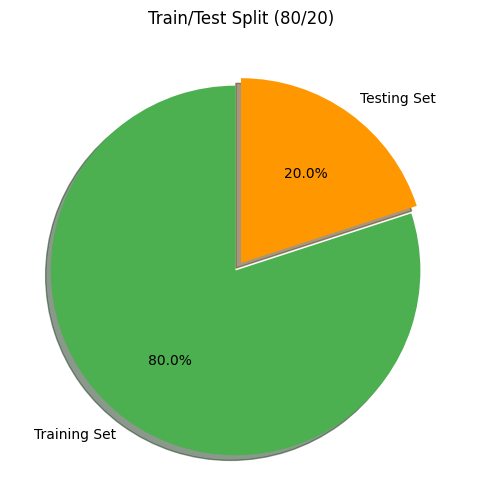

In [13]:
import matplotlib.pyplot as plt

# Define the sizes
train_size = 15788
test_size = 3947

# Labels and data
labels = ['Training Set', 'Testing Set']
sizes = [train_size, test_size]
colors = ['#4CAF50', '#FF9800']  # green for train, orange for test
explode = (0.05, 0)  # explode the training set slice slightly

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)
plt.title('Train/Test Split (80/20)')
plt.show()


## Step 3: Feature Selection 

In [5]:
 # Step 1: Apply Variance Threshold
X_train_var, X_test_var, var_cols = variance_threshold_selector(X_train, X_test, threshold=0.01)

# Step 2: Apply F-value Selection
X_train_features, X_test_features, final_cols, anova_df = f_value_selector(X_train_var, X_test_var, y_train, threshold=30)

In [6]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,month_name_February,month_name_January,month_name_March,month_name_May,face_of_day_Evening,face_of_day_Morning,face_of_day_Night
2133,0.0,19.0,45.0,19.0,45.0,20.0,44.0,19.0,46.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19730,0.0,25.0,46.0,25.0,42.0,27.0,41.0,24.0,45.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3288,0.0,22.0,44.0,21.0,42.0,21.0,44.0,22.0,40.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7730,0.0,19.0,38.0,17.0,40.0,20.0,37.0,18.0,37.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8852,0.0,20.0,35.0,17.0,39.0,20.0,37.0,19.0,34.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,21.0,40.0,19.0,43.0,23.0,39.0,21.0,39.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,0.0,22.0,43.0,22.0,42.0,22.0,41.0,21.0,44.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,20.0,35.0,18.0,37.0,20.0,37.0,18.0,35.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,21.0,35.0,20.0,35.0,21.0,36.0,21.0,35.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4: Standardized The Data 

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

## Step 5:  Multiple Linear Regression Training 

In [8]:
# Train + Evaluate
model, y_pred, metrics = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)

In [9]:
# View Summary + Metrics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        12:05:00   Log-Likelihood:                -94563.
No. Observations:               15788   AIC:                         1.892e+05
Df Residuals:                   15773   BIC:                         1.893e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.9497      0.769    127.339      0.0

In [10]:
print_metrics(metrics)


Evaluation Metrics:
RMSE: 93.86
MAE: 54.75
R2: 0.12
MAPE: 67.32
